In [17]:
import json

def parse_to_one_dict(airline_res: dict):
    result = dict()
    for k in airline_res:
        if type(airline_res[k]) == dict:
            for k2 in airline_res[k]:
                result[k2] = airline_res[k][k2]
        else:
            result[k] = airline_res[k]

    return result

with open('airline_passenger_satisfaction_dataset.json', 'rb') as file:
    jdata = json.load(file)

parsed_jdata = [parse_to_one_dict(one_airline_data) for one_airline_data in jdata]


In [31]:
import pandas as pd

travel_classes = {'Eco Plus': 0, "Eco": 1, "Business": 2}
df = pd.DataFrame(parsed_jdata)
df.satisfaction = [1 if x == "satisfied" else 0 for x in df.satisfaction]
df.travelType = [1 if "Business" in x else 0 for x in df.travelType]
df.gender = [1 if x == "Male" else 0 for x in df.gender]
df.type = [1 if "Loyal" in x else 0 for x in df.type]
df.travelClass = [travel_classes[x] for x in df.travelClass]

In [32]:
df

,travelType,travelClass,travelDistance,gender,type,age,wifiService,timeConvenient,bookingEase,gateLocation,...,entertainment,onboardService,legRoomService,baggageHandling,checkinService,inflightService,cleanliness,departureDelayInMinutes,arrivalDelayInMinutes,satisfaction
0,0,0,460,1,1,13,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,2,235,1,0,25,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,2,1142,0,1,26,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,2,562,0,1,25,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,2,214,1,1,61,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2,3599,1,1,50,3,3,3,3,...,5,5,5,5,5,5,4,12,24.0,1
9996,1,2,3873,1,1,38,5,5,5,5,...,4,4,4,4,3,4,5,0,0.0,1
9997,1,2,319,0,1,39,4,4,4,4,...,4,4,4,4,3,4,2,0,0.0,1
9998,1,2,1363,1,1,52,5,5,5,5,...,4,4,3,4,5,4,5,1,11.0,1


C:\Users\pgorgolew\AppData\Local\Temp\ipykernel_16932\1055014400.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(df.corr())
C:\Users\pgorgolew\AppData\Local\Temp\ipykernel_16932\1055014400.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Index(['travelType', 'travelClass', 'travelDistance', 'gender', 'type', 'age',
       'wifiService', 'timeConvenient', 'bookingEase', 'gateLocation', 'food',
       'boarding', 'seatComfort', 'entertainment', 'onboardService',
       'legRoomService', 'baggageHandling', 'checkinService',
       'inflightService', 'cleanliness', 'departureDelayInMinutes',
       'arrivalDelayInMinutes', 'satisfaction'],
      dtype='object')


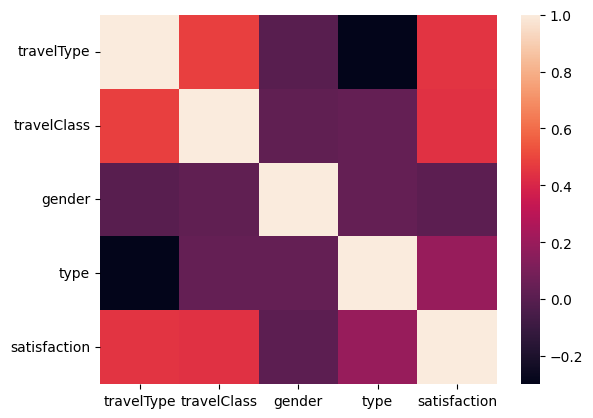

In [36]:
from seaborn import heatmap

heatmap(df.corr())
df.corr()

print(df.columns)

<AxesSubplot: >

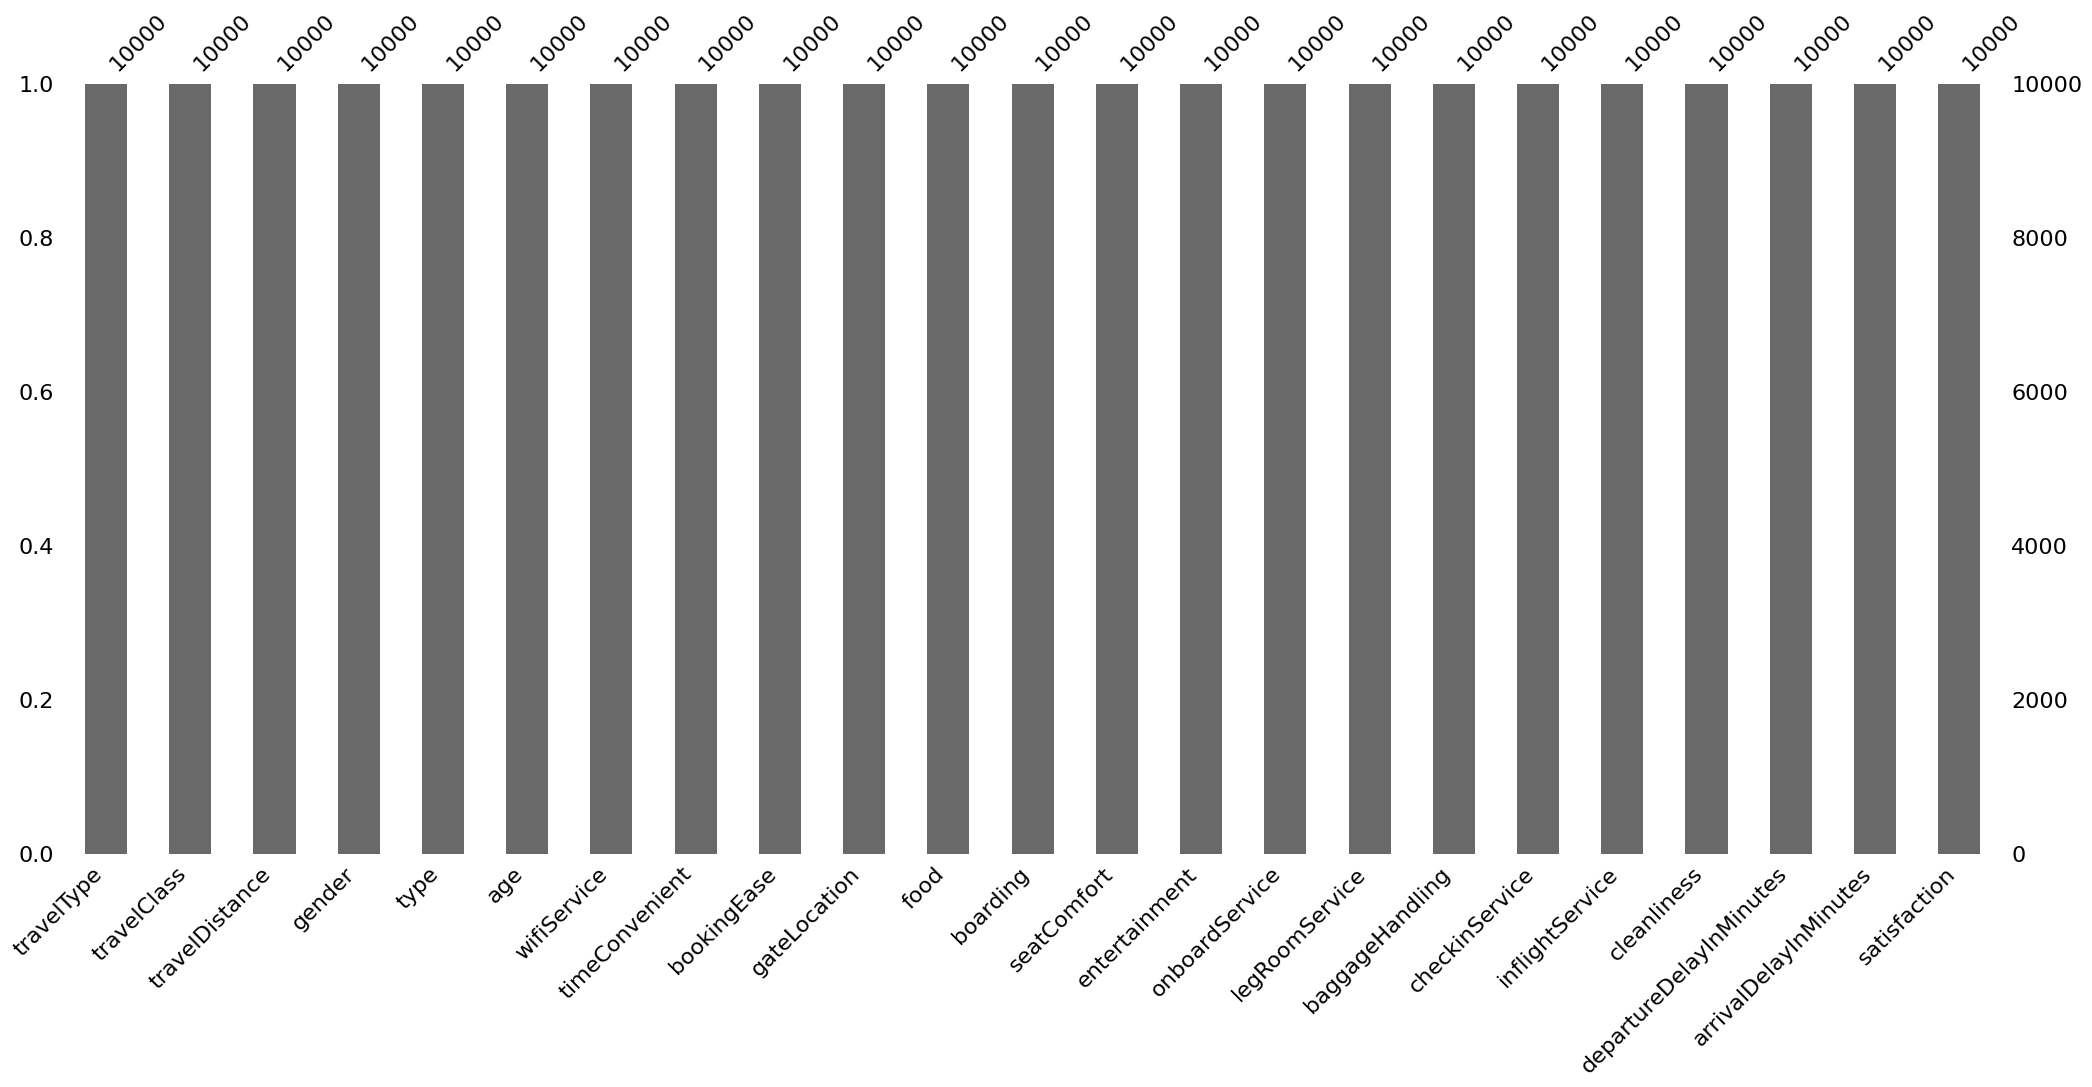

In [38]:
import missingno as msno

msno.bar(df)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   travelType               10000 non-null  int64 
 1   travelClass              10000 non-null  int64 
 2   travelDistance           10000 non-null  object
 3   gender                   10000 non-null  int64 
 4   type                     10000 non-null  int64 
 5   age                      10000 non-null  object
 6   wifiService              10000 non-null  object
 7   timeConvenient           10000 non-null  object
 8   bookingEase              10000 non-null  object
 9   gateLocation             10000 non-null  object
 10  food                     10000 non-null  object
 11  boarding                 10000 non-null  object
 12  seatComfort              10000 non-null  object
 13  entertainment            10000 non-null  object
 14  onboardService           10000 non-null